In [ ]:
#THE CODE IS WORKING LOCALY

In [44]:
import numpy as np

In [23]:
#linear hypothesis function
def h(x,theta):
    y=np.dot(x,theta.reshape(x.shape[1],1))
    return y

In [24]:
#Mean Squared Error function between the predicted values and the labels.
def mean_squared_error(y_predicted,y_label):
    squared_error=np.sqrt(np.abs(y_label-y_predicted))
    return np.mean(squared_error)

In [25]:
#a function which adds one to each instance.
def bias_column(x):
    ones_col=np.ones((x.shape[0],1))
    x= np.concatenate((ones_col,x),axis=1)
    return x

In [26]:
class LeastSquaresRegression:
    def __init__(self,):
        self.theta_ = None
        
    # Calculates theta that minimizes the MSE and updates self.theta_
    def fit(self, X, y):
        self.theta_=np.dot((np.dot(np.linalg.inv(np.dot(X.T,X)),X.T)),y)
    ## Make predictions for data X, i.e output y = h(X) (See equation in Introduction)
    def predict(self,X):
        return h(X,self.theta_)

In [27]:
import numpy as np
import matplotlib.pyplot as plt

X = 4 * np.random.rand(100, 1)
y = 10 + 2 * X + np.random.randn(100, 1)

### Visualization

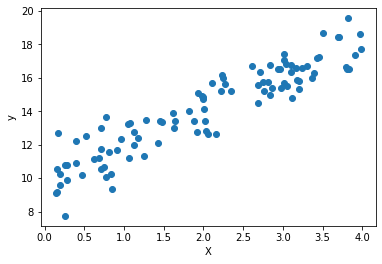

In [28]:
#Plotting these points to get a feel of the distribution.
plt.scatter(X,y)
plt.xlabel("X")
plt.ylabel("y")
plt.show()

In [29]:
#Adding one to each instance
X_new = bias_column(X)
print(X[:5])
print(" ---- ")
print(X_new[:5])

[[2.81409524]
 [2.05863783]
 [0.39102447]
 [2.6047921 ]
 [1.99598435]]
 ---- 
[[1.         2.81409524]
 [1.         2.05863783]
 [1.         0.39102447]
 [1.         2.6047921 ]
 [1.         1.99598435]]


### Weights

In [30]:
#Calculating the weights with the LeastSquaresRegression class
model = LeastSquaresRegression()
model.fit(X_new, y)

print(model.theta_)

[[9.93161806]
 [2.07368655]]


### Prediction

In [31]:
#Using our model to predict values from X and plot the two set of points superimposed.
y_new = model.predict(X_new)
y_new.shape,y.shape,X.shape

((100, 1), (100, 1), (100, 1))

### Plotting

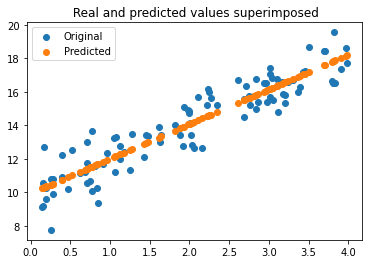

In [32]:
#plotting the two set of points superimposed
def my_plot(x,y,y_new):
    plt.scatter(x,y,label="Original")
    plt.scatter(x,y_new,label="Predicted")
    plt.legend()
    plt.title(" Real and predicted values superimposed")
my_plot(X,y,y_new)

### Gradient Descent

In [33]:
class GradientDescentOptimizer():

    def __init__(self, f, fprime, start, learning_rate = 0.1):
        self.f_      = f                       # The function
        self.fprime_ = fprime                  # The gradient of f
        self.current_ = start                  # The current point being evaluated
        self.learning_rate_ = learning_rate    # Does this need a comment ?

        # Save history as attributes
        self.history_ = [start]

    def step(self):
        # Take a gradient descent step
        #Compute the new value and update self.current_
        new_step=self.current_ - self.learning_rate_*self.fprime_(self.current_)
        
        #Append the new value to history
        self.history_.append(new_step)
        

    def optimize(self, iterations =100):
        # Use the gradient descent to get closer to the minimum:
        # For each iteration, take a gradient step
        for i in range(iterations):
            self.step()
            
    def getCurrentValue():
        self.current_ 
        # Getter for current_

    def print_result(self):
        print("Best theta found is " + str(self.current_))
        print("Value of f at this theta: f(theta) = " + str(self.f_(self.current_)))
        print("Value of f prime at this theta: f'(theta) = " + str(self.fprime_(self.current_)))

### F function

In [34]:
def f(x):
    return 3 + np.dot( (x - np.array([ [2],[6] ]) ).T, (x - np.array([[2],[6]]) ) )

In [35]:
def fprime(x):
    return 2* (x - np.array([[2],[6]]))

In [36]:
grad = GradientDescentOptimizer(f,fprime, start=np.random.normal(size=(2,)),learning_rate=0.1)
grad.optimize()
grad.print_result()

Best theta found is [0.15003176 3.00462426]
Value of f at this theta: f(theta) = [[40.64451087 18.66432998]
 [18.66432998 12.98154573]]
Value of f prime at this theta: f'(theta) = [[ -3.69993648   2.00924852]
 [-11.69993648  -5.99075148]]


### Plot f in 3D


In [37]:
def f_vectorized(x,y):
    return 3+(x-2*6)**2 +(y-6)**2

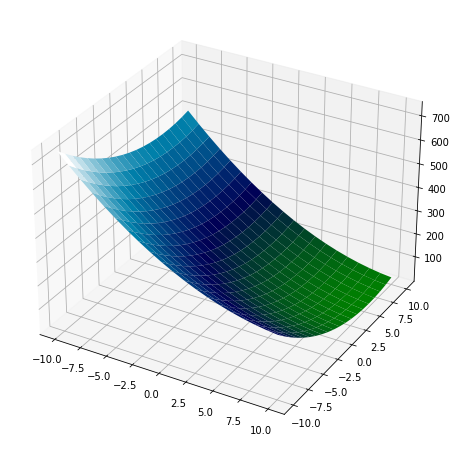

In [38]:
x_axe=np.linspace(-10,10,20)
y_axe=np.linspace(-10,10,20)
X_axe,Y_axe=np.meshgrid(x_axe,y_axe)

Z=f_vectorized(X_axe,Y_axe)

fig=plt.figure(figsize=(12,8))
ax= fig.add_subplot(111,projection='3d')

ax.plot_surface(X_axe,Y_axe,Z,cmap='ocean')
plt.show()

### Plot history

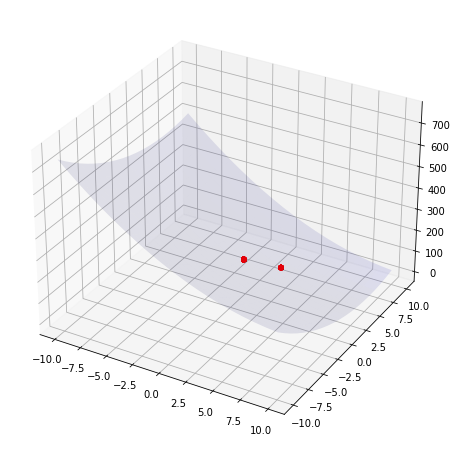

In [39]:
x_axe=np.linspace(-10,10,20)
y_axe=np.linspace(-10,10,20)
X_axe,Y_axe=np.meshgrid(x_axe,y_axe)

Z=f_vectorized(X_axe,Y_axe)

fig=plt.figure(figsize=(12,8))
ax= fig.add_subplot(111,projection='3d')

ax.plot_surface(X_axe,Y_axe,Z,color='b',rstride=1,cstride=1, alpha=0.1)

# history_array=np.array(grad.history_)
x_history=[gradient[0] for gradient in grad.history_[1:]]
y_histoty=[gradient[1] for gradient in grad.history_[1:]]
z_history=[f_vectorized(x,y) for x,y in zip(x_history,y_histoty)  ]

ax.scatter(x_history,y_histoty,z_history,marker='o',color='red')
plt.show()

In [40]:
x_history
for g in grad.history_[1:]:
    print(g[1])

[1.32002541 3.60369941]
[1.32002541 3.60369941]
[1.32002541 3.60369941]
[1.32002541 3.60369941]
[1.32002541 3.60369941]
[1.32002541 3.60369941]
[1.32002541 3.60369941]
[1.32002541 3.60369941]
[1.32002541 3.60369941]
[1.32002541 3.60369941]
[1.32002541 3.60369941]
[1.32002541 3.60369941]
[1.32002541 3.60369941]
[1.32002541 3.60369941]
[1.32002541 3.60369941]
[1.32002541 3.60369941]
[1.32002541 3.60369941]
[1.32002541 3.60369941]
[1.32002541 3.60369941]
[1.32002541 3.60369941]
[1.32002541 3.60369941]
[1.32002541 3.60369941]
[1.32002541 3.60369941]
[1.32002541 3.60369941]
[1.32002541 3.60369941]
[1.32002541 3.60369941]
[1.32002541 3.60369941]
[1.32002541 3.60369941]
[1.32002541 3.60369941]
[1.32002541 3.60369941]
[1.32002541 3.60369941]
[1.32002541 3.60369941]
[1.32002541 3.60369941]
[1.32002541 3.60369941]
[1.32002541 3.60369941]
[1.32002541 3.60369941]
[1.32002541 3.60369941]
[1.32002541 3.60369941]
[1.32002541 3.60369941]
[1.32002541 3.60369941]
[1.32002541 3.60369941]
[1.32002541 3.60

In [41]:
grad.history_

[array([0.15003176, 3.00462426]),
 array([[0.52002541, 2.80369941],
        [1.32002541, 3.60369941]]),
 array([[0.52002541, 2.80369941],
        [1.32002541, 3.60369941]]),
 array([[0.52002541, 2.80369941],
        [1.32002541, 3.60369941]]),
 array([[0.52002541, 2.80369941],
        [1.32002541, 3.60369941]]),
 array([[0.52002541, 2.80369941],
        [1.32002541, 3.60369941]]),
 array([[0.52002541, 2.80369941],
        [1.32002541, 3.60369941]]),
 array([[0.52002541, 2.80369941],
        [1.32002541, 3.60369941]]),
 array([[0.52002541, 2.80369941],
        [1.32002541, 3.60369941]]),
 array([[0.52002541, 2.80369941],
        [1.32002541, 3.60369941]]),
 array([[0.52002541, 2.80369941],
        [1.32002541, 3.60369941]]),
 array([[0.52002541, 2.80369941],
        [1.32002541, 3.60369941]]),
 array([[0.52002541, 2.80369941],
        [1.32002541, 3.60369941]]),
 array([[0.52002541, 2.80369941],
        [1.32002541, 3.60369941]]),
 array([[0.52002541, 2.80369941],
        [1.32002541, 3

In [42]:
x_history

[array([0.52002541, 2.80369941]),
 array([0.52002541, 2.80369941]),
 array([0.52002541, 2.80369941]),
 array([0.52002541, 2.80369941]),
 array([0.52002541, 2.80369941]),
 array([0.52002541, 2.80369941]),
 array([0.52002541, 2.80369941]),
 array([0.52002541, 2.80369941]),
 array([0.52002541, 2.80369941]),
 array([0.52002541, 2.80369941]),
 array([0.52002541, 2.80369941]),
 array([0.52002541, 2.80369941]),
 array([0.52002541, 2.80369941]),
 array([0.52002541, 2.80369941]),
 array([0.52002541, 2.80369941]),
 array([0.52002541, 2.80369941]),
 array([0.52002541, 2.80369941]),
 array([0.52002541, 2.80369941]),
 array([0.52002541, 2.80369941]),
 array([0.52002541, 2.80369941]),
 array([0.52002541, 2.80369941]),
 array([0.52002541, 2.80369941]),
 array([0.52002541, 2.80369941]),
 array([0.52002541, 2.80369941]),
 array([0.52002541, 2.80369941]),
 array([0.52002541, 2.80369941]),
 array([0.52002541, 2.80369941]),
 array([0.52002541, 2.80369941]),
 array([0.52002541, 2.80369941]),
 array([0.5200